In [53]:
import coco_text
COCO_DATA='/home/sravya/data/muse/coco/coco2017/'
ct = coco_text.COCO_Text(COCO_DATA+ 'COCO_Text.json')

loading annotations into memory...
0:00:01.287039
creating index...
index created!


# Initial exploration

In [54]:
train_img_ids = ct.getImgIds(imgIds=ct.train)
valid_img_ids = ct.getImgIds(imgIds=ct.val)
test_img_ids = ct.getImgIds(imgIds=ct.test)

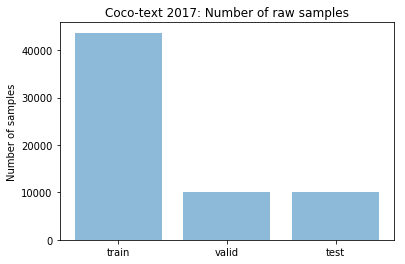

In [55]:
import matplotlib.pyplot as plt
import numpy as np
objects = ('train', 'valid', 'test')
y_pos = np.arange(len(objects))
num_samples = [len(train_img_ids), len(valid_img_ids), len(test_img_ids)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Number of raw samples')
 
plt.show()

In [56]:
ct.cats

{'class': {'1': {'id': 1, 'name': 'machine printed'},
  '2': {'id': 2, 'name': 'handwritten'},
  '3': {'id': 3, 'name': 'others'}},
 'legibility': {'1': {'id': 1, 'name': 'legible'},
  '2': {'id': 2, 'name': 'illegible'}},
 'script': {'1': {'id': 1, 'name': 'english'},
  '2': {'id': 2, 'name': 'not english'},
  '3': {'id': 3, 'name': 'na'}}}

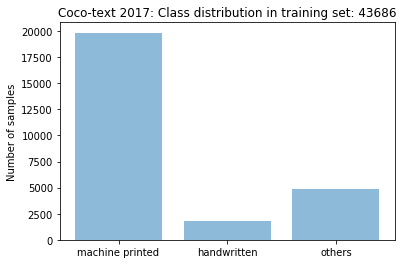

In [63]:
train_machine_printed = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'machine printed')])
train_handwritten = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'handwritten')])
train_class_other = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'others')])

objects = ('machine printed', 'handwritten', 'others')
y_pos = np.arange(len(objects))
num_samples = [len(train_machine_printed), len(train_handwritten), len(train_class_other)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Class distribution in training set: ' + str(len(train_img_ids)))
 
plt.show()

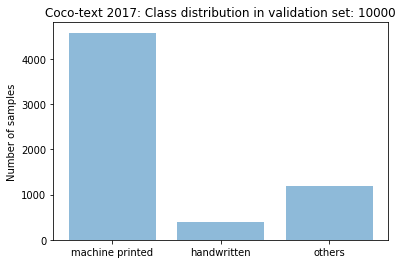

In [64]:
valid_machine_printed = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'machine printed')])
valid_handwritten = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'handwritten')])
valid_class_other = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'others')])

objects = ('machine printed', 'handwritten', 'others')
y_pos = np.arange(len(objects))
num_samples = [len(valid_machine_printed), len(valid_handwritten), len(valid_class_other)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Class distribution in validation set: '+ str(len(valid_img_ids)))
 
plt.show()

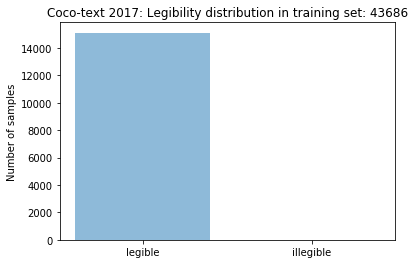

In [65]:
train_legible = ct.getImgIds(imgIds=ct.train, catIds=[('legibility', 'legible')])
train_non_legible = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'illegible')])

objects = ('legible', 'illegible')
y_pos = np.arange(len(objects))
num_samples = [len(train_legible), len(train_non_legible)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Legibility distribution in training set: '+ str(len(train_img_ids)))
 
plt.show()

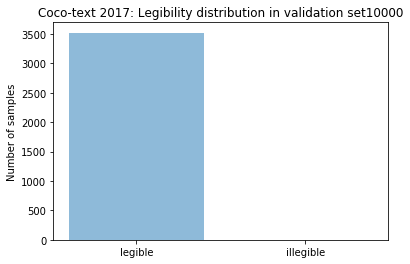

In [66]:
valid_legible = ct.getImgIds(imgIds=ct.val, catIds=[('legibility', 'legible')])
valid_non_legible = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'illegible')])

objects = ('legible', 'illegible')
y_pos = np.arange(len(objects))
num_samples = [len(valid_legible), len(valid_non_legible)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Legibility distribution in validation set' + str(len(valid_img_ids)))
 
plt.show()

# Check images are coming from the correct split

In [67]:
train_imgs = ct.loadImgs(train_img_ids)
valid_imgs = ct.loadImgs(valid_img_ids)

In [68]:
train_imgs[0]

{'file_name': 'COCO_train2014_000000262145.jpg',
 'height': 427,
 'id': 262145,
 'set': 'train',
 'width': 640}

In [69]:
bad_example =0
for img in train_imgs:
    if 'train' not in img['file_name']:
        bad_example +=1

In [70]:
bad_example

0

In [73]:
valid_imgs[0]

{'file_name': 'COCO_train2014_000000229378.jpg',
 'height': 640,
 'id': 229378,
 'set': 'val',
 'width': 480}

In [71]:
bad_example =0
for img in valid_imgs:
    if 'valid' not in img['file_name']:
        bad_example +=1

In [72]:
bad_example 
#NOTE: All valdiation examples are in train set/folder
#Coco-text 2017 json has names of 2014 files
# 2017 files do not have COCO_train2014_ prefix

10000

# Get annotations

In [17]:
train_ann_ids = ct.getAnnIds(train_img_ids)
valid_ann_ids = ct.getAnnIds(valid_img_ids)

In [45]:
len(train_ann_ids)

118309

In [19]:
train_anns = ct.loadAnns(train_ann_ids)
train_anns

# Make sure there is no overlap between training and validation sets

In [4]:
set(train_img_ids).intersection(valid_img_ids)

set()

# Understand bounding box values

In [12]:
# Check x, y
img_id = train_img_ids[456]
img = ct.loadImgs(img_id)
path = '{}{}/'.format(COCO_DATA, 'train2014')    
filename = img[0]['file_name']
ann_ids = ct.getAnnIds(img_id)
anns = ct.loadAnns(ann_ids)
anns[0]['bbox'][0], anns[0]['bbox'][1]

(237.35902881622314, 256.32779026031494)

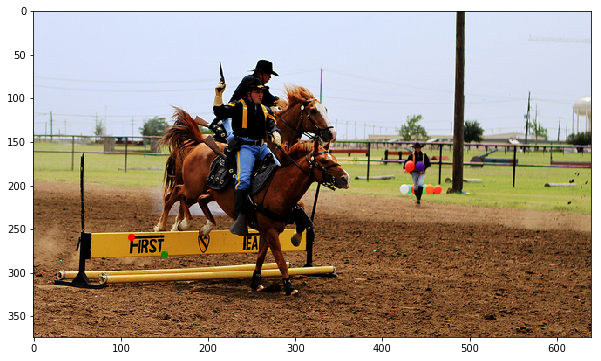

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.imshow(Image.open(path + filename))
xmin = anns[1]['bbox'][0]
ymin = anns[1]['bbox'][1]
b_width = anns[1]['bbox'][2]
b_height = anns[1]['bbox'][3]
xmax = xmin + b_width
ymax = ymin + b_height
xs = [xmin, xmax]
ys = [ymin, ymax]
vcol = ['r','g']
for j in [0,1]:
    plt.scatter(xs[j],ys[j], color=vcol[j])

In [21]:
b_width,b_height

(38, 19)

# Visualize bounding boxes using coco-text helper

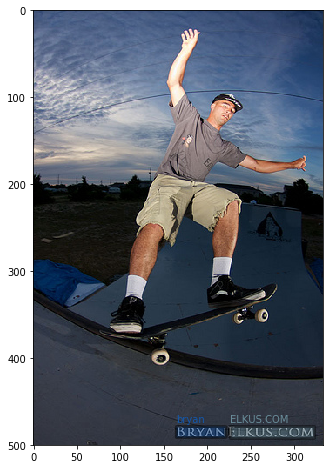

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.imshow(img)
ct.showAnns(anns)